In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [2]:
from model_training import *

In [3]:
X_fraud = pd.read_csv("../data/X_fraud.csv")
y_fraud = pd.read_csv("../data/y_fraud.csv")
X_creditcard = pd.read_csv("../data/X_creditcard.csv")
y_creditcard = pd.read_csv("../data/y_creditcard.csv")

In [4]:

# Split the data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = split_data(X_fraud, y_fraud)


2024-11-20 05:43:51,657 - INFO - Splitting the dataset into training and testing sets


In [13]:
# Balance the data
X_fraud_train_balanced, y_fraud_train_balanced = balance_data(X_fraud_train, y_fraud_train)

2024-11-20 06:24:24,489 - INFO - Balancing the dataset using SMOTE
2024-11-20 06:24:24,492 - INFO - Encoding categorical features
2024-11-20 06:24:25,332 - INFO - Encoded column: device_id
2024-11-20 06:24:25,667 - INFO - Before Resampling: [109588  11301]
2024-11-20 06:24:25,670 - INFO - After Resampling: [109588 109588]


In [14]:
# Preprocess and scale the training and testing data
X_fraud_train_scaled = preprocess_and_scale_data(X_fraud_train_balanced)
X_fraud_test_scaled = preprocess_and_scale_data(X_fraud_test)


2024-11-20 06:24:32,869 - INFO - Preprocessing and scaling data
2024-11-20 06:24:33,044 - INFO - Preprocessing and scaling data
2024-11-20 06:24:33,221 - INFO - Encoded column: device_id


In [9]:
# Train and compare models
fraud_results = compare_models(X_fraud_train_scaled, X_fraud_test_scaled, y_fraud_train_balanced, y_fraud_test)

2024-11-20 05:47:02,876 - INFO - Comparing multiple models
2024-11-20 05:47:02,878 - INFO - Performing cross-validation for model: LogisticRegression
2024-11-20 05:47:05,444 - INFO - Cross-Validation AUC: 0.59 ± 0.02
2024-11-20 05:47:05,446 - INFO - Training and evaluating model: LogisticRegression
2024-11-20 05:47:06,661 - INFO - Model: LogisticRegression | Accuracy: 0.50 | AUC: 0.50
2024-11-20 05:47:06,752 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.50      0.64     27373
           1       0.09      0.50      0.16      2850

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.40     30223
weighted avg       0.83      0.50      0.60     30223

2024-11-20 05:47:06,753 - INFO - Performing cross-validation for model: DecisionTreeClassifier
2024-11-20 05:47:23,172 - INFO - Cross-Validation AUC: 0.84 ± 0.02
2024-11-20 05:47:23,173 - INFO - Training and evaluating model: Dec

2024-11-20 06:18:35,910 - INFO - Visualizing model results for Fraud Dataset


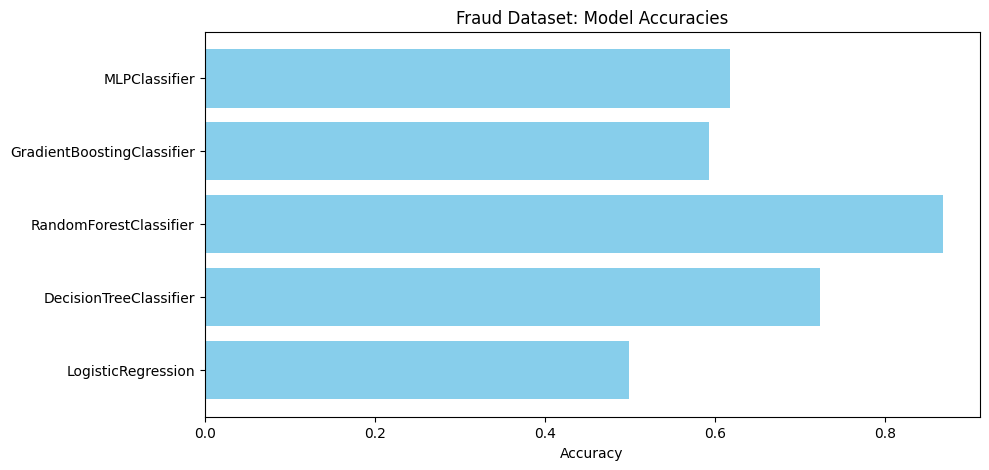

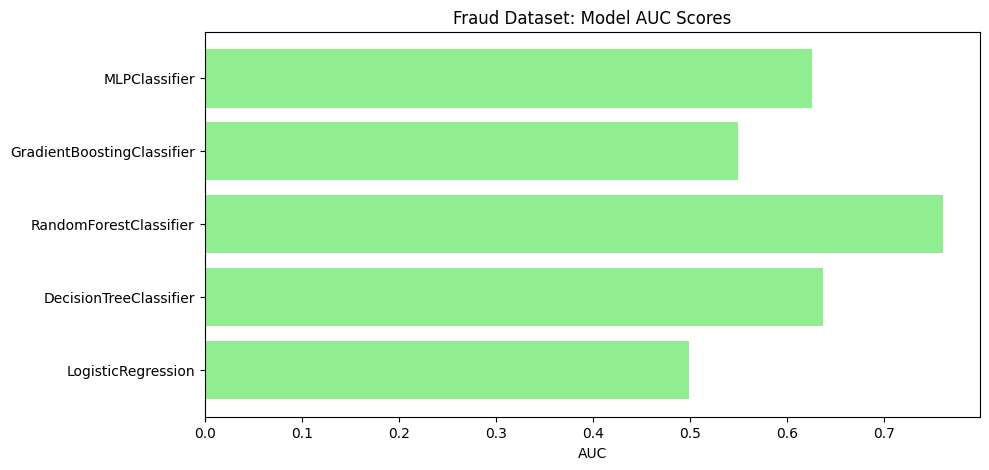

In [10]:
# Visualize results
plot_model_results(fraud_results, "Fraud Dataset")